## cruzamento de medias móveis

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import mplcyberpunk
plt.style.use("cyberpunk")

In [3]:
ticker = 'BRSR6.SA' 
dados = yf.download([ticker,'^BVSP'], period='5y', auto_adjust=True)['Close']

# acao
dados['retorno_acao'] = dados[ticker].pct_change()
dados['retorno_acum_acao'] = (1 + dados['retorno_acao']).cumprod() - 1
# ibov
dados["retorno_ibov"] = dados['^BVSP'].pct_change().dropna()
dados["retorno_ibov"] = (1 + dados["retorno_ibov"]).cumprod() - 1

[*********************100%%**********************]  2 of 2 completed


In [4]:
rapida = 7
lenta = 40

dados['mm rapida'] = dados[ticker].rolling(window=rapida).mean()
dados['mm lenta']  = dados[ticker].rolling(window=lenta).mean()

In [5]:
# acao
dados['retorno_acao'] = dados[ticker].pct_change()
dados['retorno_acum_acao'] = (1 + dados['retorno_acao']).cumprod() - 1
# ibov
dados["retorno_ibov"] = dados['^BVSP'].pct_change().dropna()
dados["retorno_ibov"] = (1 + dados["retorno_ibov"]).cumprod() - 1

dados=dados.dropna()

In [6]:
# Criando sinal de compra (1) e venda (-1)
dados['sinal'] = 0
dados['sinal'] = np.where(dados['mm rapida'] > dados['mm lenta'], 1, -1)
dados['sinal'] = dados['sinal'].shift(1)


# estratégia
dados['retorno_estrategia'] = dados['retorno_acao'] * dados['sinal']
dados['retorno_acum_estr'] = (1+dados['retorno_estrategia']).cumprod() -1

dados.dropna(inplace=True)

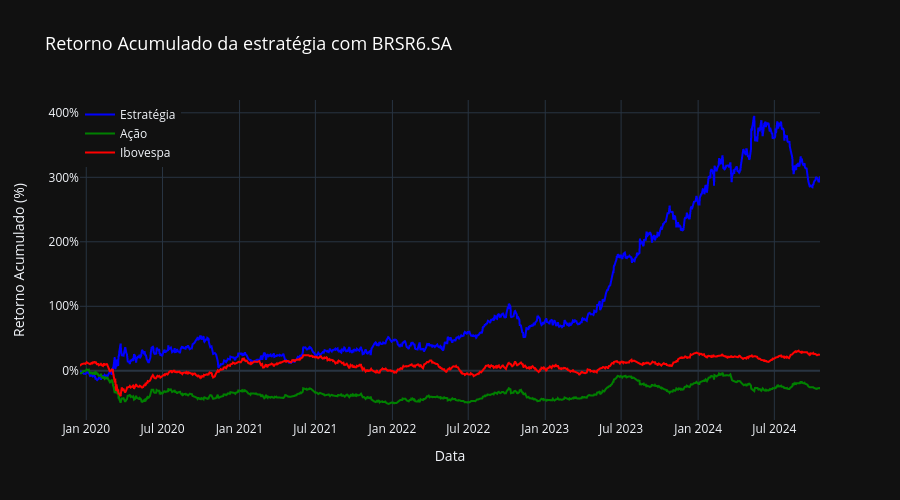

In [7]:
import plotly.graph_objects as go

# Criação da figura
fig = go.Figure()

# Adiciona a linha para 'Estratégia'
fig.add_trace(go.Scatter(x=dados.index, 
                         y=dados['retorno_acum_estr'], 
                         mode='lines',
                         name='Estratégia',
                         line=dict(color='blue')))

# Adiciona a linha para 'Ação'
fig.add_trace(go.Scatter(x=dados.index, 
                         y=dados['retorno_acum_acao'], 
                         mode='lines',
                         name='Ação',
                         line=dict(color='green')))

# Adiciona a linha para 'Ibovespa'
fig.add_trace(go.Scatter(x=dados.index, 
                         y=dados['retorno_ibov'], 
                         mode='lines',
                         name='Ibovespa',
                         line=dict(color='red')))

# Ajusta o layout, incluindo o título e o formato da escala percentual
fig.update_layout(
    title=f'Retorno Acumulado da estratégia com {ticker}',
    title_font=dict(size=18, color='white'),
    xaxis_title='Data',
    yaxis_title='Retorno Acumulado (%)',
    yaxis_tickformat=',.0%',  # Formata os valores do eixo Y em porcentagem sem casas decimais
    legend=dict(x=0, y=1, traceorder='normal'),
    template='plotly_dark',  # Use um tema similar ao "cyberpunk"
    width=900, height=500
)

# Exibe o gráfico
fig.show('png')
